In [1]:
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"

--2022-06-12 14:32:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4738776 (4.5M) [application/x-httpd-php]
Saving to: ‘DryBeanDataset.zip’

DryBeanDataset.zip  100%[===================>]   4.52M  4.30MB/s    in 1.1s    

2022-06-12 14:32:21 (4.30 MB/s) - ‘DryBeanDataset.zip’ saved [4738776/4738776]



In [3]:
!unzip "DryBeanDataset.zip"

Archive:  DryBeanDataset.zip
   creating: DryBeanDataset/
  inflating: DryBeanDataset/Dry_Bean_Dataset.arff  
  inflating: DryBeanDataset/Dry_Bean_Dataset.txt  
  inflating: DryBeanDataset/Dry_Bean_Dataset.xlsx  


In [4]:
import os
data_path = os.path.join("/content/DryBeanDataset",os.listdir("DryBeanDataset")[1])

In [5]:
df = pd.read_excel(data_path)

In [ ]:
#printing the sample view table
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
#viewing different types of classes in bean data frame
Y = pd.get_dummies(df["Class"])

In [7]:
Y

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
13606,0,0,0,1,0,0,0
13607,0,0,0,1,0,0,0
13608,0,0,0,1,0,0,0
13609,0,0,0,1,0,0,0


In [8]:
from sklearn.model_selection import train_test_split


In [9]:
x = df.drop("Class", axis = 1)
y = Y

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2, random_state=42
)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size=0.9)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
x_valid_scaled = scaler.transform(x_valid)

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_scaled, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test_scaled, y_test)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((x_valid_scaled, y_valid)).batch(32)

In [14]:
train_dataset
m = next(iter(train_dataset))
m[1]

<tf.Tensor: shape=(32, 7), dtype=uint8, numpy=
array([[0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64 , activation = "relu"), 
    tf.keras.layers.Dense(32 , activation = "relu"),
    tf.keras.layers.Dense(16 , activation = "relu"),
    tf.keras.layers.Dense(8 , activation = "relu"),
    tf.keras.layers.Dense(7, activation = "softmax"),
]) 

In [17]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# model.compile(loss='categorical_crossentropy', optimizer=opt)

In [18]:
model.compile(
    optimizer=opt,
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
    
)

In [19]:
history = model.fit(train_dataset, validation_data = val_dataset, epochs = 100)

Epoch 1/100
307/307 [==============================] - 2s 3ms/step - loss: 0.6504 - accuracy: 0.7851 - val_loss: 0.2616 - val_accuracy: 0.9063
Epoch 2/100
307/307 [==============================] - 1s 3ms/step - loss: 0.2423 - accuracy: 0.9169 - val_loss: 0.2347 - val_accuracy: 0.9100
Epoch 3/100
307/307 [==============================] - 1s 2ms/step - loss: 0.2210 - accuracy: 0.9218 - val_loss: 0.2252 - val_accuracy: 0.9164
Epoch 4/100
307/307 [==============================] - 1s 2ms/step - loss: 0.2107 - accuracy: 0.9238 - val_loss: 0.2187 - val_accuracy: 0.9183
Epoch 5/100
307/307 [==============================] - 1s 2ms/step - loss: 0.2050 - accuracy: 0.9249 - val_loss: 0.2151 - val_accuracy: 0.9174
Epoch 6/100
307/307 [==============================] - 1s 2ms/step - loss: 0.2011 - accuracy: 0.9263 - val_loss: 0.2135 - val_accuracy: 0.9201
Epoch 7/100
307/307 [==============================] - 1s 2ms/step - loss: 0.1980 - accuracy: 0.9268 - val_loss: 0.2114 - val_accuracy: 0.9219

In [20]:
history =  history.history

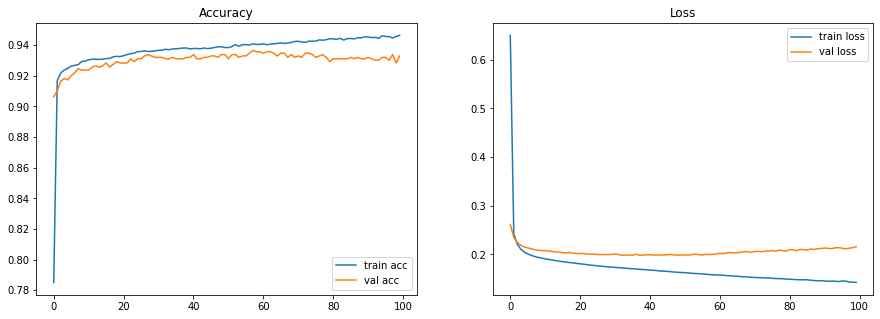

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Accuracy")
plt.plot(history["accuracy"],label="train acc")
plt.plot(history["val_accuracy"],label="val acc")
plt.legend()

plt.subplot(122)
plt.title("Loss")
plt.plot(history["loss"],label="train loss")
plt.plot(history["val_loss"],label="val loss")
plt.legend()

plt.show()

In [22]:
loss ,accuracy = model.evaluate(test_dataset)

86/86 [==============================] - 0s 3ms/step - loss: 0.2347 - accuracy: 0.9321
